# DSCI Group Project Proposal: Predicting Heart Disease based on Age, Resting ECG, and Presence of Exercise-Induced Angina #

#### Clare Sheinin, Emese Soti, Saman Atiq, Sarah Teng ####

## Introduction ##

Heart disease is a term that refers to a variety of conditions that affect the heart. Common conditions include coronary artery disease and exercise-induced angina. Several factors are associated with heart disease, such as high blood pressure, high levels of sodium, cholesterol, sugar, and fats, increasing age, and lack of physical activity. In the US, heart disease is the greatest cause of death for both men and women. Cardiovascular disease claims one life in the United States every 33 seconds. In 2021 alone, 695,000 people died from heart disease(Centers for Disease Control and Prevention, n.d.). Considering these striking stats related to the prevalence of heart disease in the US, we decided to base our project on a knn classification algorithm that will help us predict the presence of heart disease based on the cleveland data( a city in Ohio, US).

Our exploratory question is: 

**Can we predict if a patient has heart disease (num) based on their age (age), their resting ecg (restecg), and whether they have exercise-induced angina (exang)?** 

We will assess the Cleveland Heart Disease dataset, which uses a total of 14 attributes, to help us answer this question. This dataset contains a few unknown values shown by a question mark (?), however, they are not variables we will be analyzing to answer our question. The cleveland data contains the following attributes:
1. **age** - Patient's age
2. **sex** - Patient's sex
3. **cp** - Patient's chest pain type
4. **trestbps** - Patient's Resting blood pressure
5. **chol** - Patient's serum cholesterol level (mg/dl)
6. **fbs**- True if patient's fasting blood sugar > 120 mg/dl
7. **restecg** - Patient's resting electrocardiographic results
8. **thalach** - Patient's maximum heart rate
9. **exang** - 'yes' if patient's exercise induced angina, 'no' otherwise
10. **oldpeak** - Patient's ST Depression induced by exercise relative to rest levels
11. **slope** - The slope of the peak exercise ST segment ('downsloping', 'flat', or 'upsloping')
12. **ca** - Number of major vessels (0-3) colored by fluoroscopy
13. **thal** - Presence of thalassemia in a patient ('fixed', 'reversible', or 'normal')
14. **num** - Diagnosis of heart disease (val= 0 indicates absence of heart disease, val= (1, 2, 3, 4) shows presence of heart disease

## Cleaning and wrangling the data set: ##

### loading the libraries and the data set:

In [73]:
# Loading tidyverse libraries
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source("tests.R")
source('cleanup.R')

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [74]:
# Reading in the Data
cleveland <- read_csv("processed.cleveland.data")
cleveland

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


63.0,1.0...2,1.0...3,145.0,233.0,1.0...6,2.0,150.0,0.0...9,2.3,3.0,0.0...12,6.0,0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [75]:
# The data had no column names, so here we added them
columns <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
cleveland <- read_csv("processed.cleveland.data", col_names = columns)
cleveland

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [77]:
# Here we changed our variables of interest into factors and integers to make them easier to work with/plot
# The 'num' column becomes 'yes' or 'no' based on whether the number indicates heart disease
cleveland_tidy <- cleveland |>
  mutate(
    num = as.factor(as.integer(num)),
    num = recode(num, "0" = "No", "1" = "Yes", "2" = "Yes", "3" = "Yes", "4" = "Yes"),
    restecg = as.integer(restecg),
    restecg = recode(restecg, "0" = "0", "1" = "1", "2" = "1"),
    exang = as.integer(exang),
    age = as.integer(age),
    restecg = as.integer(restecg),
    trestbps = as.integer(trestbps),
    chol = as.integer(chol)
      )
cleveland_tidy

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,1,150,0,2.3,3,0.0,6.0,No
67,1,4,160,286,0,1,108,1,1.5,2,3.0,3.0,Yes
67,1,4,120,229,0,1,129,1,2.6,2,2.0,7.0,Yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,Yes
57,0,2,130,236,0,1,174,0,0.0,2,1.0,3.0,Yes
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,No


## Method:
### Explain how you will conduct either your data analysis and which variables/columns you will use:
We first loaded the data set into our proposal and added column headings to the dataset since they were missing in the original file. Then we split the data set into the training and testing data set using the optimal 75:25 ratio. We decided to use the resting ecg value and the exercise-induced angina values as integer to investigate whether this effects the diagnosis (num value. We carried out further analyses on the data and summarized each of the column that we were going to use according to its average value and compared it with the diagnoses column (num). Analysing the resulting table showed that the average age is higher for those with heart disease and on average more patients with heart disease had abnormal ECG and angina values (1 = abnormal).
Therefore we decided to use "age", "restecg" and "exang" columns as predictors for our data analyses to predict the "num" column(heart disease diagnoses).


### Describe at least one way that you will visualize the results:
We will use a scatterplot to plot Patient's resting electrocardiographic results (restecg), Patient's age(age) and  maximum heart rate (thalach) and the relation between these three to predict the diagnoses (num) of the patient. <br>
The points will be colored and shaped based on num, with no representing absence of heart disease while yes representing if the patient has a heart disease.


In [78]:
# Splitting the data into training and testing sets
cleveland_split <- initial_split(cleveland_tidy, prop = 0.75, strata = num)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

In [82]:
# Summarizing the data
cleveland_table <- cleveland_train |>
    group_by(num) |>
    summarize(n_obs = n(), age_avg = mean(age), restecg_avg = mean(restecg), 
              exang_avg = mean(exang), trestbps_avg = mean(trestbps), chol_avg = mean(chol))
cleveland_table
# We can see from this table that the average age is higher for those with heart disease
# On average more patients with heart disease had abnormal ECG and angina values (1 = abnormal)
# On average heart disease patients had higher resting blood pressure and higher cholesterol

num,n_obs,age_avg,restecg_avg,exang_avg,trestbps_avg,chol_avg
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
No,123,52.25203,0.4552846,0.1463415,129.0407,245.9350
Yes,104,57.20192,0.6057692,0.5576923,136.2308,252.1058


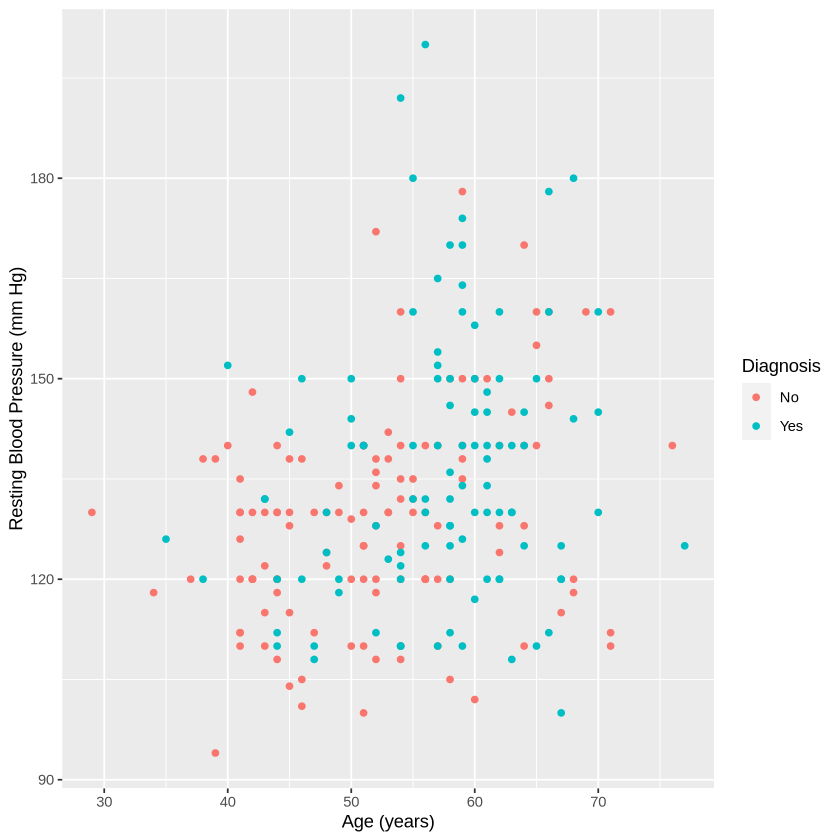

In [90]:
plot_1 <- ggplot(cleveland_train, aes(x = age, y = trestbps, color = num)) +
          geom_point() +
          labs (x = "Age (years)", y = "Resting Blood Pressure (mm Hg)", color = "Diagnosis")       
plot_1
# There's a slight positive trend in the data, with a higher concentration of "Yes" diagnoses farther from the origin

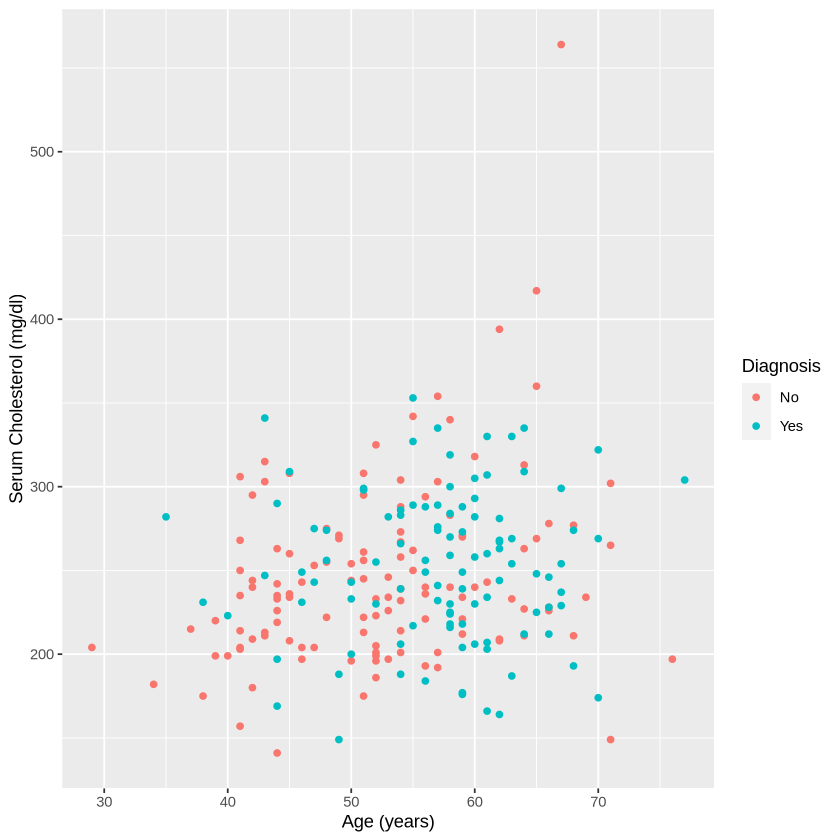

In [88]:
plot_2 <- ggplot(cleveland_train, aes(x = age, y = chol, color = num)) +
          geom_point() +
          labs (x = "Age (years)", y = "Serum Cholesterol (mg/dl)", color = "Diagnosis")       
plot_2
# Again, there's a slight positive trend in the data, with a higher concentration of "Yes" diagnoses farther from the origin

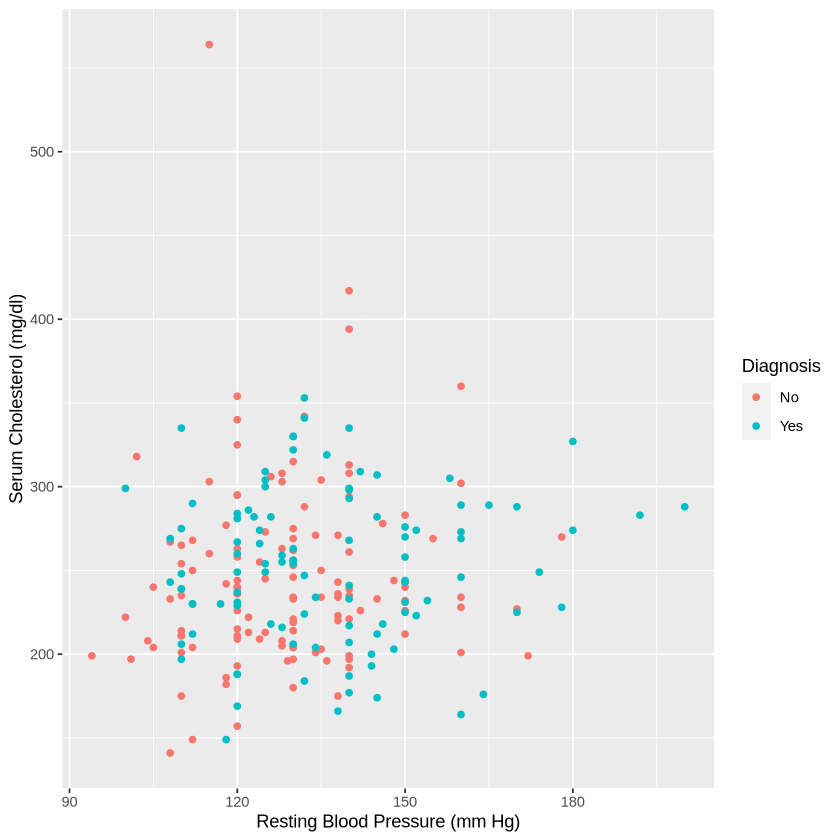

In [91]:
plot_3 <- ggplot(cleveland_train, aes(x = trestbps, y = chol, color = num)) +
          geom_point() +
          labs (x = "Resting Blood Pressure (mm Hg)", y = "Serum Cholesterol (mg/dl)", color = "Diagnosis")       
plot_3
# Again, there's a slight positive trend in the data, but no clear higher concentration of diagnoses

## Expected Outcomes and Significance ##

- What do you expect to find
- What impact could such findings have
- What future questions could this lead to

## References: ##

- Centers for Disease Control and Prevention (CDC). (n.d.). Heart Disease Facts.https://www.cdc.gov/heartdisease/facts.htm